# Evaluation on a real 3D spatial transcriptomics data

## Import packages and set configurations

In [1]:
import scanpy as sc
import numpy as np

In [2]:
from SpatialZ import *

## Data preprocessing

In [3]:
adata_raw = sc.read_h5ad('./data/starmap/starmap_3d_add_celltype.h5ad')

In [4]:
adata = adata_raw.copy()
adata

AnnData object with n_obs × n_vars = 32845 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass'
    uns: 'leiden', 'leiden_colors', 'moranI', 'neighbors', 'spatial_neighbors', 'umap'
    obsm: 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [5]:
del adata.uns
del adata.obsm['X_umap']
del adata.obsp

In [6]:
np.unique(adata.obs['z'])

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94])

In [7]:
# Filtered top and bottom layers to avoid technical noise and unreliable areas.
adata = adata[~adata.obs['z'].isin([6, 7, 8, 9, 10, 11, 12, 13, 91 ,92, 93, 94])].copy()

In [8]:
# The remaining tissue was then divided into seven consecutive sections.

def split_data_into_slices(adata, num_slices):
    """
    Split data into specified number of slices and add 'slice_id' column to adata.obs.
    
    Parameters:
    adata (AnnData): AnnData object containing the data.
    num_slices (int): Number of slices to divide the data into.
    """

    unique_z = np.unique(adata.obs['z'])

    base_slice_size = len(unique_z) // num_slices
    remainder = len(unique_z) % num_slices


    indices = [0]

    for i in range(num_slices):
        current_slice_size = base_slice_size + (1 if i < remainder else 0)
        indices.append(indices[-1] + current_slice_size)

    slice_values_list = []
    for i in range(num_slices):
        slice_values = unique_z[indices[i]:indices[i+1]]
        slice_values_list.append(slice_values)
        print(f'slice_{i+1}_values:', slice_values)

    def assign_slice_id(z):
        for i, slice_values in enumerate(slice_values_list):
            if z in slice_values:
                return f'slice_{i+1}'
        return None

    adata.obs['slice_id'] = adata.obs['z'].apply(assign_slice_id)



split_data_into_slices(adata, 7)

slice_1_values: [14 15 16 17 18 19 20 21 22 23 24]
slice_2_values: [25 26 27 28 29 30 31 32 33 34 35]
slice_3_values: [36 37 38 39 40 41 42 43 44 45 46]
slice_4_values: [47 48 49 50 51 52 53 54 55 56 57]
slice_5_values: [58 59 60 61 62 63 64 65 66 67 68]
slice_6_values: [69 70 71 72 73 74 75 76 77 78 79]
slice_7_values: [80 81 82 83 84 85 86 87 88 89 90]


In [9]:
slice_1 = adata[adata.obs['slice_id']=='slice_1']
slice_1

View of AnnData object with n_obs × n_vars = 4073 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [10]:
slice_2 = adata[adata.obs['slice_id']=='slice_2']
slice_2

View of AnnData object with n_obs × n_vars = 4187 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [11]:
slice_3 = adata[adata.obs['slice_id']=='slice_3']
slice_3

View of AnnData object with n_obs × n_vars = 4169 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [12]:
slice_4 = adata[adata.obs['slice_id']=='slice_4']
slice_4

View of AnnData object with n_obs × n_vars = 4102 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [13]:
slice_5 = adata[adata.obs['slice_id']=='slice_5']
slice_5

View of AnnData object with n_obs × n_vars = 4110 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [14]:
slice_6 = adata[adata.obs['slice_id']=='slice_6']
slice_6

View of AnnData object with n_obs × n_vars = 4162 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [15]:
slice_7 = adata[adata.obs['slice_id']=='slice_7']
slice_7

View of AnnData object with n_obs × n_vars = 4175 × 28
    obs: 'x', 'y', 'z', 'n_counts', 'leiden', 'cell_class', 'cell_subclass', 'slice_id'
    obsm: 'spatial'

In [16]:
n_cell_slice_2 = len(slice_2.obs_names)
n_cell_slice_4 = len(slice_4.obs_names)
n_cell_slice_6 = len(slice_6.obs_names)

## Running SpatialZ to generate multiple slices from two tissue sections

In [17]:
sim_slice2 = Generate_multiple_spatialz(slice_1, slice_3, num_sim=1, 
                                    adata1_id='slice1', adata2_id='slice3',
                                    device='cuda:6', n_cell=n_cell_slice_2, n_mag=1., lr=1e5, nb_iter_max=1000, seed=42, num_projections=200,
                                    cell_type_key='cell_class',k_sam=50, micro_env_key ='mender', Beta = 100,
                                    verbose=True, include_raw=False)

Generating simulations:   0%|          | 0/1 [00:00<?, ?it/s]

Begin to generate spatial coordinates......
coordinate initialization time: 1.13 seconds
Iteration 0: Loss = 20.793865203857422
Ot optimization time: 9.18 seconds
Begin to determine cell types......
Cell type determination time: 3.95 seconds
Begin to calculate micro-environment measurement......
Micro-environment measurement time: 19.46 seconds
Begin to synthesize gene expression......


Generating simulations: 100%|██████████| 1/1 [00:45<00:00, 45.44s/it]

Gene expression synthesis time: 11.69 seconds
Completed slice1-slice3-1 generated!


In [18]:
sim_slice4 = Generate_multiple_spatialz(slice_3, slice_5, num_sim=1, 
                                    adata1_id='slice3', adata2_id='slice5',
                                    device='cuda:6', n_cell=n_cell_slice_4, n_mag=1., lr=1e5, nb_iter_max=1000, seed=42, num_projections=200,
                                    cell_type_key='cell_class',k_sam=50, micro_env_key ='mender', Beta = 100,
                                    verbose=True, include_raw=False)

Generating simulations:   0%|          | 0/1 [00:00<?, ?it/s]

Begin to generate spatial coordinates......
coordinate initialization time: 0.00 seconds
Iteration 0: Loss = 8.148412704467773
Ot optimization time: 7.08 seconds
Begin to determine cell types......
Cell type determination time: 3.77 seconds
Begin to calculate micro-environment measurement......
Micro-environment measurement time: 17.16 seconds
Begin to synthesize gene expression......


Generating simulations: 100%|██████████| 1/1 [00:39<00:00, 39.93s/it]

Gene expression synthesis time: 11.91 seconds
Completed slice3-slice5-1 generated!


In [19]:
sim_slice6 = Generate_multiple_spatialz(slice_5, slice_7, num_sim=1, 
                                    adata1_id='slice5', adata2_id='slice7',
                                    device='cuda:6', n_cell=n_cell_slice_6, n_mag=1., lr=1e5, nb_iter_max=1000, seed=42, num_projections=200,
                                    cell_type_key='cell_class',k_sam=50, micro_env_key ='mender', Beta = 100,
                                    verbose=True, include_raw=False)

Generating simulations:   0%|          | 0/1 [00:00<?, ?it/s]

Begin to generate spatial coordinates......
coordinate initialization time: 0.00 seconds
Iteration 0: Loss = 10.70384693145752
Ot optimization time: 7.11 seconds
Begin to determine cell types......
Cell type determination time: 3.94 seconds
Begin to calculate micro-environment measurement......
Micro-environment measurement time: 19.97 seconds
Begin to synthesize gene expression......


Generating simulations: 100%|██████████| 1/1 [00:42<00:00, 42.06s/it]

Gene expression synthesis time: 11.02 seconds
Completed slice5-slice7-1 generated!


In [20]:
sim_slice2

AnnData object with n_obs × n_vars = 4187 × 28
    obs: 'cell_class', 'slice_id', 'data_type'
    obsm: 'spatial', 'mender'

In [21]:
data1=slice_2.copy()
data2=sim_slice2.copy()
data3=slice_4.copy()
data4=sim_slice4.copy()
data5=slice_6.copy()
data6=sim_slice6.copy()

In [22]:
data1.X = data1.X.toarray()
data3.X = data3.X.toarray()
data5.X = data5.X.toarray()

In [23]:
data1.X

array([[4.98000e+02, 1.57000e+02, 1.54000e+02, ..., 1.51680e+04,
        4.81480e+04, 9.48800e+03],
       [5.43000e+02, 2.50000e+02, 2.74400e+03, ..., 1.09700e+04,
        1.34900e+05, 7.56140e+04],
       [1.39500e+03, 1.56000e+02, 1.18000e+02, ..., 2.48490e+04,
        1.89285e+05, 6.57090e+04],
       ...,
       [7.89500e+03, 6.96000e+03, 9.25170e+04, ..., 9.94300e+03,
        1.22300e+04, 1.14160e+04],
       [1.42420e+04, 1.65600e+03, 6.05500e+03, ..., 9.27700e+03,
        5.99300e+03, 1.29100e+04],
       [4.02800e+03, 5.05000e+02, 2.66000e+02, ..., 9.89000e+02,
        3.25000e+02, 6.28600e+03]], dtype=float32)

In [24]:
data2.X

array([[2.46900e+03, 1.90000e+02, 1.70000e+02, ..., 1.39260e+04,
        1.41842e+05, 7.16840e+04],
       [4.37000e+02, 2.51000e+02, 1.43000e+02, ..., 1.19770e+04,
        1.19517e+05, 6.55790e+04],
       [2.76400e+03, 2.44000e+02, 1.64000e+02, ..., 2.20840e+04,
        2.07471e+05, 1.30402e+05],
       ...,
       [4.77090e+04, 1.73000e+03, 7.28800e+03, ..., 1.61760e+04,
        3.09500e+04, 5.02600e+03],
       [7.92930e+04, 1.84300e+03, 2.82000e+02, ..., 7.07300e+03,
        4.51100e+03, 1.03100e+03],
       [9.38400e+03, 7.96000e+02, 8.10600e+03, ..., 7.85800e+03,
        6.43200e+03, 2.42660e+04]], dtype=float32)

In [25]:
sc.pp.normalize_total(data1, target_sum=1e4)
sc.pp.log1p(data1)

sc.pp.normalize_total(data2, target_sum=1e4)
sc.pp.log1p(data2)

sc.pp.normalize_total(data3, target_sum=1e4)
sc.pp.log1p(data3)

sc.pp.normalize_total(data4, target_sum=1e4)
sc.pp.log1p(data4)

sc.pp.normalize_total(data5, target_sum=1e4)
sc.pp.log1p(data5)

sc.pp.normalize_total(data6, target_sum=1e4)
sc.pp.log1p(data6)

In [26]:
sc.tl.pca(data1, svd_solver='arpack')
sc.tl.pca(data2, svd_solver='arpack')
sc.tl.pca(data3, svd_solver='arpack')
sc.tl.pca(data4, svd_solver='arpack')
sc.tl.pca(data5, svd_solver='arpack')
sc.tl.pca(data6, svd_solver='arpack')

## Comparing real sections and virtual tissue slices..

In [27]:
def calculate_statistics(adata):

    mean_log_expression = np.mean(adata.X, axis=0)
    var_log_expression = np.var(adata.X, axis=0)
    detection_freq = np.sum(adata.X > 0, axis=0) / adata.n_obs

    feature_correlation = np.corrcoef(adata.X.T)

    log_library_size = np.log1p(adata.X.sum(axis=1))


    cell_distances = np.asarray([np.linalg.norm(v-w) for v in adata.obsm['X_pca'] for w in adata.obsm['X_pca']])
    cell_distance_matrix = cell_distances.reshape(adata.n_obs, adata.n_obs)
    
    cell_correlation = np.corrcoef(adata.obsm['X_pca'])

    cell_detection_freq = np.sum(adata.X > 0, axis=1) / adata.n_vars

    return (mean_log_expression, var_log_expression, detection_freq, feature_correlation,
            log_library_size, cell_distance_matrix, cell_detection_freq, cell_correlation)


In [28]:
stats1 = calculate_statistics(data1)
stats2 = calculate_statistics(data2)
stats3 = calculate_statistics(data3)
stats4 = calculate_statistics(data4)
stats5 = calculate_statistics(data5)
stats6 = calculate_statistics(data6)

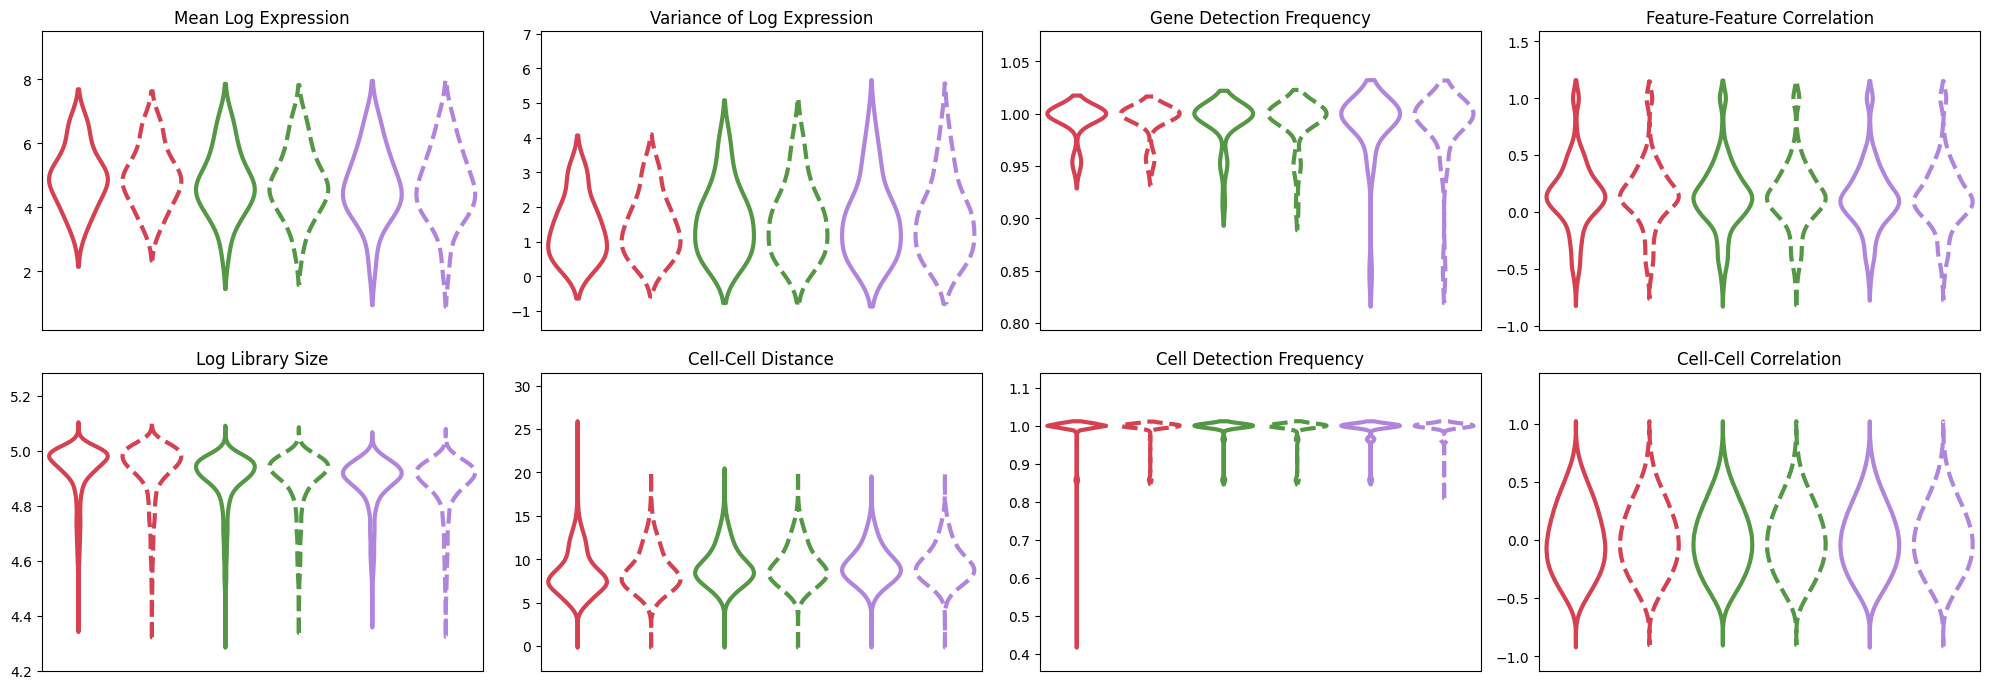

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import palettable  

def plot_violins(stats1, stats2, stats3, stats4, stats5, stats6, labels):
    colorlist = ['#D54151', '#D54151', '#549745', '#549745', '#B185DC', '#B185DC']
    linestyles = ['-', '--', '-', '--', '-', '--']  
    
    fig, axes = plt.subplots(2, 4, figsize=(20, 7))
    for i, ax in enumerate(axes.flatten()):
        ax.set_axisbelow(True)

        data = [stats1[i], stats2[i], stats3[i], stats4[i], stats5[i], stats6[i]]
        parts = sns.violinplot(data=data, ax=ax, inner=None, linewidth=3, scale='width', alpha=0.7, zorder=3)

        for k, pc in enumerate(parts.collections):
            idx = k // 1  
            pc.set_facecolor('none') 
            pc.set_edgecolor(colorlist[idx])  
            pc.set_linestyle(linestyles[idx]) 

        # 设置y轴的上下限以及透明度
        ymin, ymax = ax.get_ylim()
        ypad = (ymax - ymin) * 0.05
        ax.set_ylim(ymin - ypad, ymax + 3*ypad)

        ax.grid(False)  
        ax.xaxis.set_visible(False)  
        ax.set_title(labels[i])

    plt.tight_layout()
    plt.show()
    
labels = [
    "Mean Log Expression", "Variance of Log Expression", "Gene Detection Frequency",
    "Feature-Feature Correlation", "Log Library Size", "Cell-Cell Distance",
    "Cell Detection Frequency", "Cell-Cell Correlation"
]
    
plot_violins(stats1, stats2, stats3, stats4, stats5, stats6, labels)